This notebook demonstrates how to generate missing data using the pattern-based multivariate amputation module available in the mdatagen package. This module is a wrapper around the pyampute package and addresses key challenges in generating artificial missing data under the MAR (Missing At Random) mechanism.

In addition, an excellent video lesson is available on YouTube at the following link:
📺 https://youtu.be/jMEzKFV-ilc?si=bVQ-kYjOelAqdN0h

van Buuren, S., J. P. L. Brand, C. G. M. Groothuis-Oudshoorn, and D. B. Rubin.
        Fully conditional specification in multivariate imputation.
        Journal of Statistical Computation and Simulation, 76(12):1049–1064, 2006.

Schouten, R. M., P. Lugtig, and G. Vink.
        Generating missing values for simulation purposes: a multivariate amputation procedure.
        Journal of Statistical Computation and Simulation, 88(15):2909–2930, 2018.

In [ ]:
# Import the libraries
import numpy as np 
import pmlb
from mdatagen.multivariate.mMAR import mMAR
from mdatagen.plots import PlotMissingData

# Function to help split data
def split_data(data):
    df = data.copy()
    X = df.drop(columns=["target"])
    y = data["target"]

    return X,np.array(y)

# The data from PMLB
kddcup = pmlb.fetch_data('kddcup')
X_, y_ = split_data(kddcup)

generator = mMAR(X=X_, y=y_,n_Threads=1)

gen_md = generator.pattern_missingness()

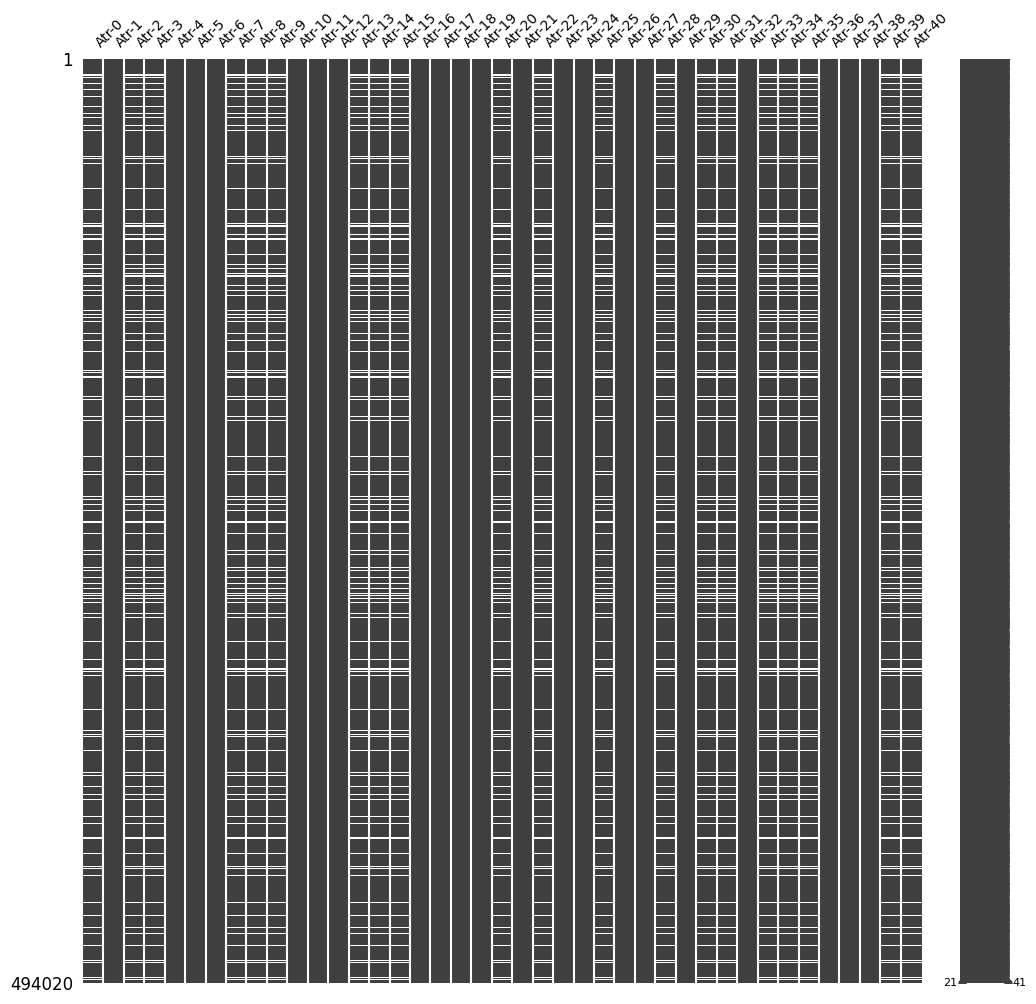

In [4]:
miss_plot = PlotMissingData(data_missing=gen_md, 
                            data_original=X_)

miss_plot.visualize_miss("normal", save=False)

- A more robust example:

In [7]:
import pandas as pd
seed = 2022
rng = np.random.default_rng(seed)

m = 1000
n = 3
X_compl = pd.DataFrame(rng.standard_normal((m, n)))
y_compl = np.random.randint(0, 2, size=m)

patterns = [{
      "score_to_probability_func": "SIGMOID-LEFT",
      "mechanism": "MAR",
      "incomplete_vars":[1],
      "weights": [2.3, 0, -0.4],
      "freq": 0.7
  },
           {

      "mechanism": "MAR",
      "incomplete_vars":[2],
      "weights": [0, 0, 1.3],
      "freq": 0.3
  }, ]

generator = mMAR(X=X_compl, y=y_compl)

gen_md = generator.pattern_missingness(patterns=patterns,
                                       verbose=True)

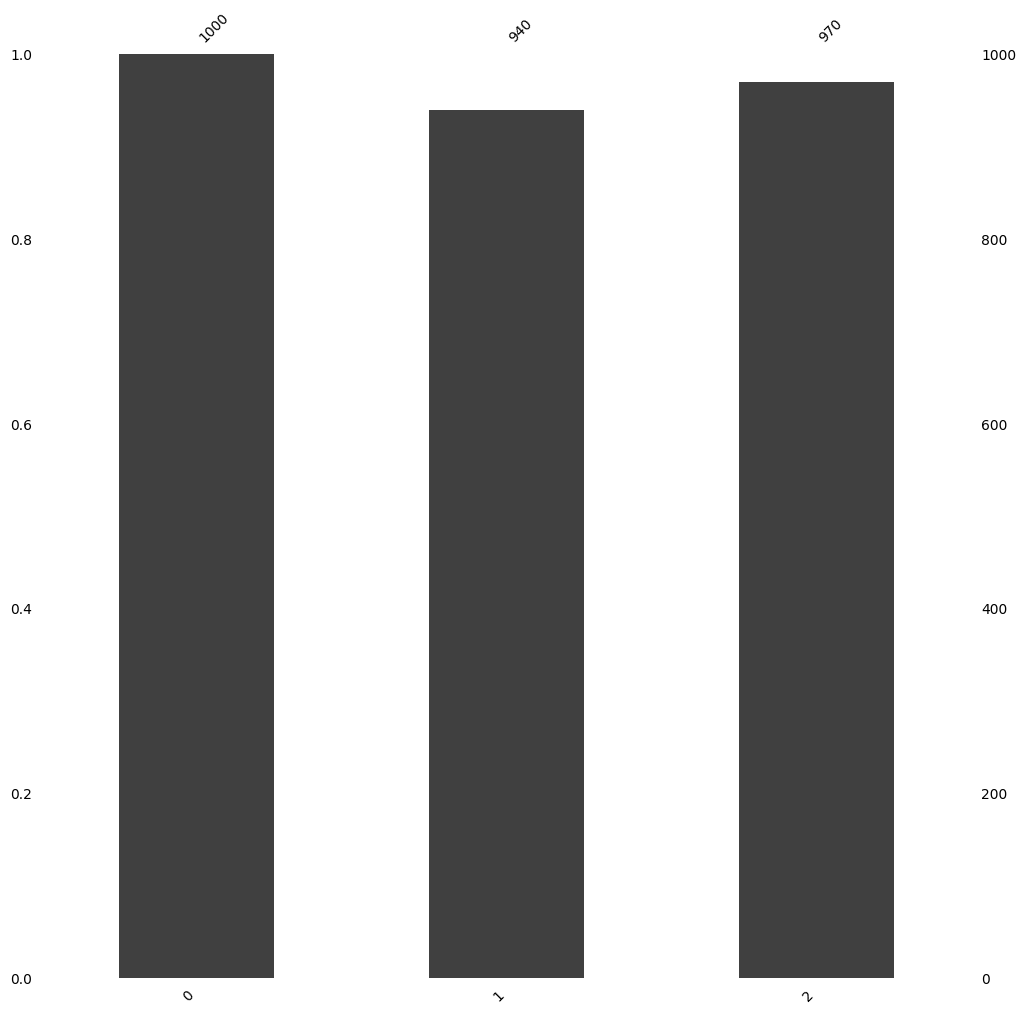

In [8]:
miss_plot = PlotMissingData(data_missing=gen_md, 
                            data_original=X_compl)

miss_plot.visualize_miss("bar", save=False)